
# Comprehensive Demo for `glazzbocks`

This notebook demonstrates how to use the `glazzbocks` library across the full ML workflow for both:
- Linear Regression (Diabetes dataset)
- Logistic Regression (Breast Cancer dataset)

Modules Covered:
- `DataExplorer` (EDA)
- `MLPipeline` (model training)
- `ModelDiagnostics` (evaluation)
- `ModelInterpreter` (interpretability)


## Load Datasets
We will use two classic datasets from scikit-learn:

- **Diabetes** dataset for regression
- **Breast Cancer** dataset for classification

These are structured datasets that are suitable for demonstrating transparent, interpretable machine learning workflows.

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# Your Installed Glazzbocks Modules
from glazzbocks.data_explorer import DataExplorer
from glazzbocks.ML_pipeline import MLPipeline
from glazzbocks.diagnostics import ModelDiagnostics
from glazzbocks.modelinterpreter import ModelInterpreter
from glazzbocks.utils.preprocessing import create_numeric_pipeline


## Load Datasets
We will use classic datasets from scikit-learn:

- **Diabetes** dataset for regression

These are structured datasets that are suitable for demonstrating transparent, interpretable machine learning workflows.

In [2]:

# Regression: Diabetes Dataset
diabetes = load_diabetes(as_frame=True)
df_reg = diabetes.frame.copy()
df_reg['target'] = diabetes.target


## Exploratory Data Analysis (EDA) with `DataExplorer`
`DataExplorer` provides streamlined EDA with helpful statistics like skewness, class entropy, and visual tools such as correlation heatmaps. This step helps understand data distributions, imbalance, and prepare for modeling.

No categorical features found.


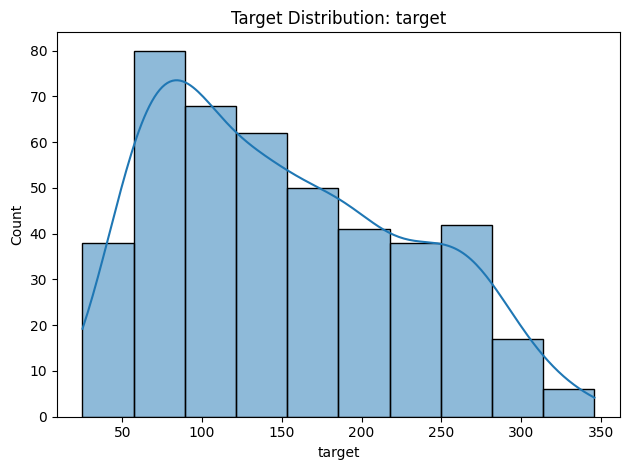

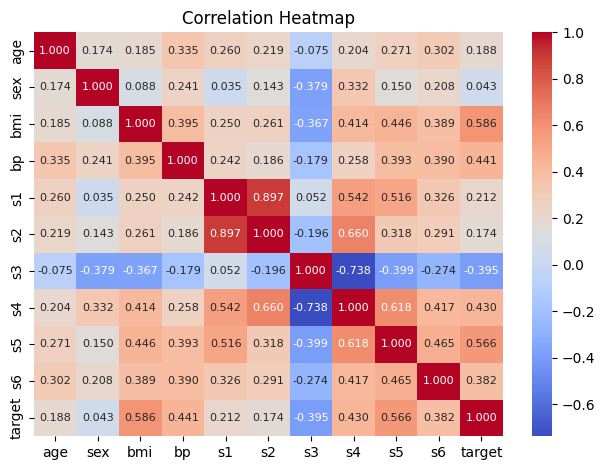

C:\Users\jthom\AppData\Local\Programs\Python\Python312\Lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


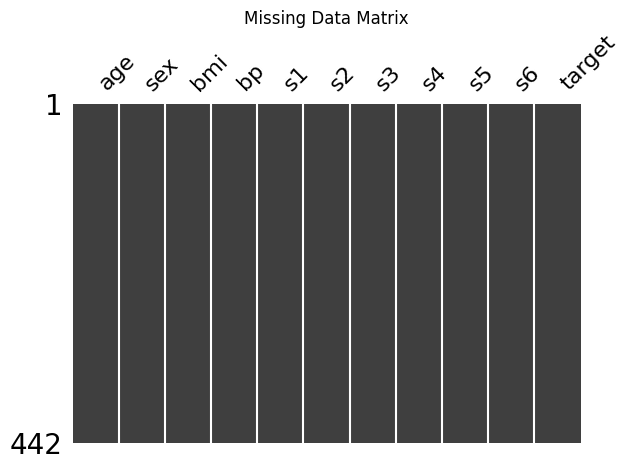

PDF exported to: C:/Users/jthom/OneDrive/Documents/GitHub/glazzbocks/glazzbocks/eda_business_ready.pdf


In [3]:
explorer = DataExplorer(df_reg, target_col='target')
explorer.generate_report("C:/Users/jthom/OneDrive/Documents/GitHub/glazzbocks/glazzbocks/eda_business_ready.pdf")


In [4]:
explorer_reg = DataExplorer(df_reg, target_col='target')

In [5]:
explorer_reg.numeric_summary()

Dataset Summary: 442 rows × 11 columns


,Data Type,Missing (%),Mean,Median,Min,25th %ile,75th %ile,Max,Skewness
age,float64,0.00,-0.00,0.01,-0.11,-0.04,0.04,0.11,-0.23
sex,float64,0.00,0.00,-0.04,-0.04,-0.04,0.05,0.05,0.13
bmi,float64,0.00,-0.00,-0.01,-0.09,-0.03,0.03,0.17,0.60
bp,float64,0.00,-0.00,-0.01,-0.11,-0.04,0.04,0.13,0.29
s1,float64,0.00,-0.00,-0.00,-0.13,-0.03,0.03,0.15,0.38
s2,float64,0.00,0.00,-0.00,-0.12,-0.03,0.03,0.20,0.44
s3,float64,0.00,-0.00,-0.01,-0.10,-0.04,0.03,0.18,0.80
s4,float64,0.00,-0.00,-0.00,-0.08,-0.04,0.03,0.19,0.74
s5,float64,0.00,0.00,-0.00,-0.13,-0.03,0.03,0.13,0.29
s6,float64,0.00,0.00,-0.00,-0.14,-0.03,0.03,0.14,0.21


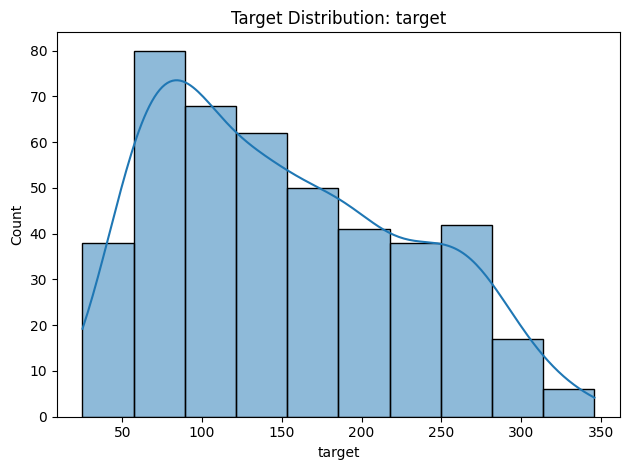

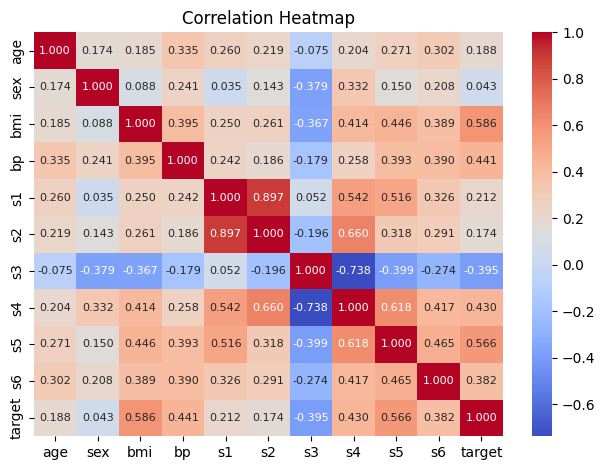

,statistic,p_value,normal
sex,1895.74026,0.0,False
s3,47.880653,0.0,False
s4,36.314361,0.0,False
bmi,23.665619,0.000007,False
age,22.980727,0.00001,False
s2,18.031283,0.000121,False
bp,15.621391,0.000405,False
s1,11.208528,0.003682,False
s5,6.462738,0.039503,False
s6,4.295702,0.116735,True


In [6]:

explorer_reg.plot_target_distribution()
explorer_reg.correlation_heatmap()
explorer_reg.test_normality()

## Regression Pipeline with Linear Regression
We initialize a `MLPipeline` without a model and then explicitly set `LinearRegression`. We split the data into train/test, build the pipeline with preprocessing, and perform cross-validation to evaluate generalization.

In [7]:

# Linear Regression Pipeline

# Initialize the pipeline (no model yet)
reg_pipe = MLPipeline()

# Set the model explicitly
reg_pipe.set_model(LinearRegression())

# Continue as normal
X_train_reg, X_test_reg, y_train_reg, y_test_reg = reg_pipe.split_data(df_reg, 'target')
reg_pipe.build_pipeline(X_train_reg)
reg_pipe.cross_validate(X_train_reg, y_train_reg)
reg_pipe.cv_results_['metrics']


Model set to: LinearRegression()


,mse,rmse,mae,r2
fold,,,,
fold_0,2850.936345,53.394160,43.982858,0.477726
fold_1,2778.847129,52.714771,44.983232,0.461539
fold_2,3059.242519,55.310420,49.076298,0.582527
fold_3,3323.856580,57.652897,47.611146,0.489891
fold_4,2991.757100,54.696957,42.072745,0.449515
fold_5,2645.214441,51.431648,43.774138,0.378218
fold_6,2773.237696,52.661539,43.379158,0.511396
fold_7,3391.428838,58.235975,46.738039,0.427023
fold_8,2385.716130,48.843793,38.240845,0.552869


## Model Diagnostics (Regression)
We evaluate the regression model using diagnostics such as residual plots and predicted vs. actual values. This helps assess model fit, bias, variance, and assumptions like normality of residuals.

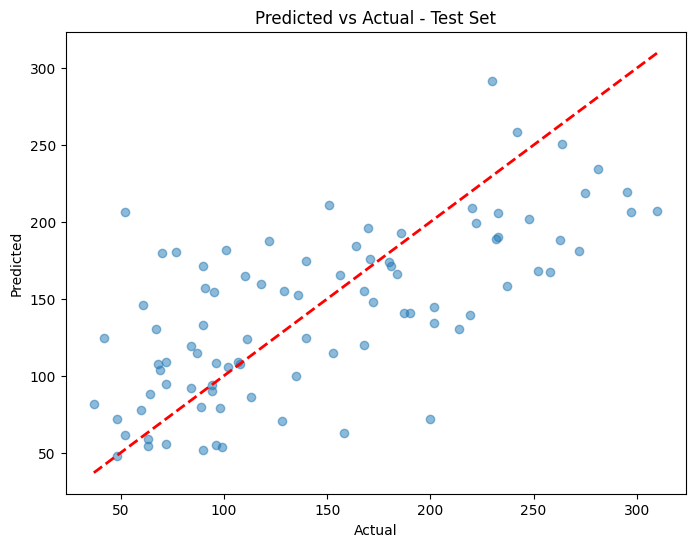

Normality Test: stat=0.53, p=0.769 → Normal


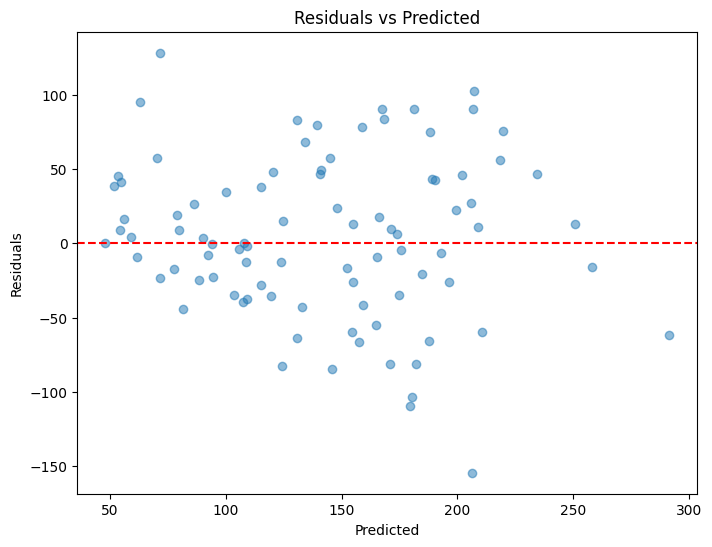

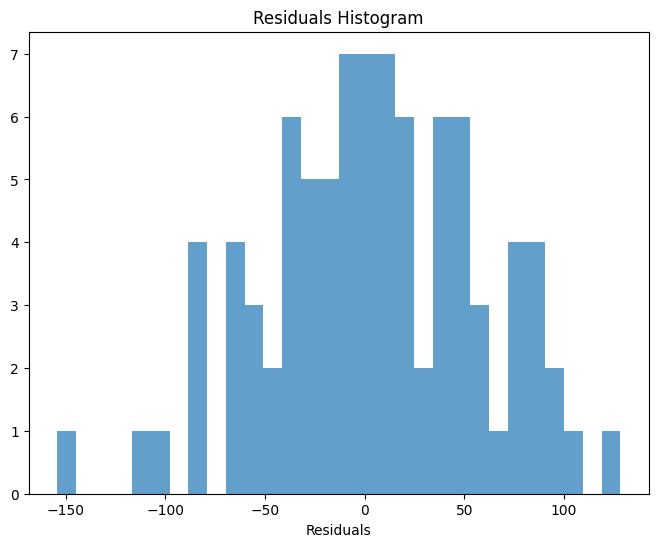

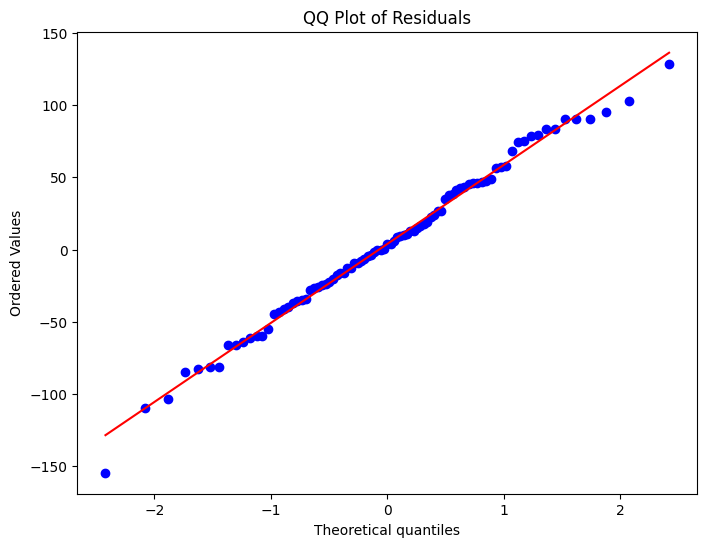

In [ ]:
reg_pipe.pipeline.fit(X_train_reg, y_train_reg)

diagnostics_reg = ModelDiagnostics(reg_pipe.pipeline)
diagnostics_reg.auto_plot(X_test_reg, y_test_reg)

## Interpretability (Regression)
`ModelInterpreter` gives insight into feature importances via coefficients, SHAP values, and permutation tests. We interpret how each feature contributes to predictions in a transparent way.

Model Interpreter Summary
Model type: LinearRegression
Task: regression
Feature count: 10
Supports:
 - Coefficients: True
 - Feature Importances: False
 - SHAP: (if model is compatible)


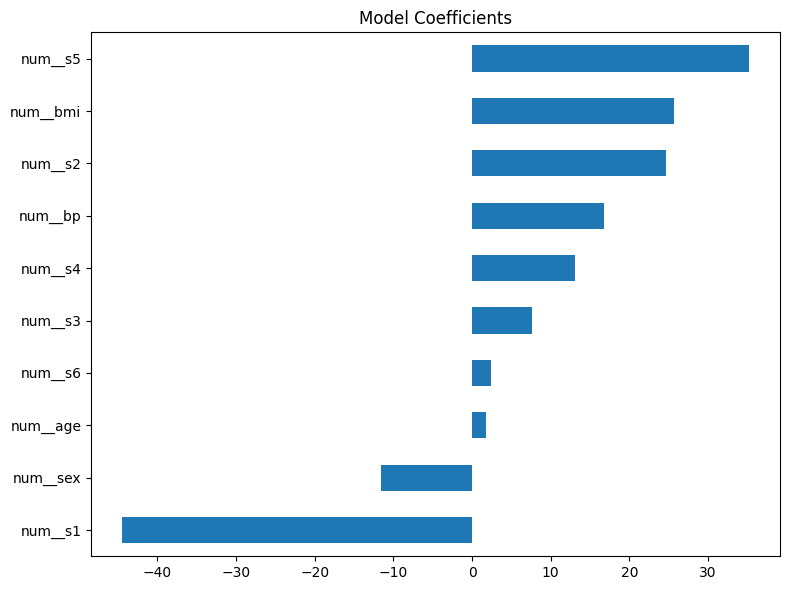

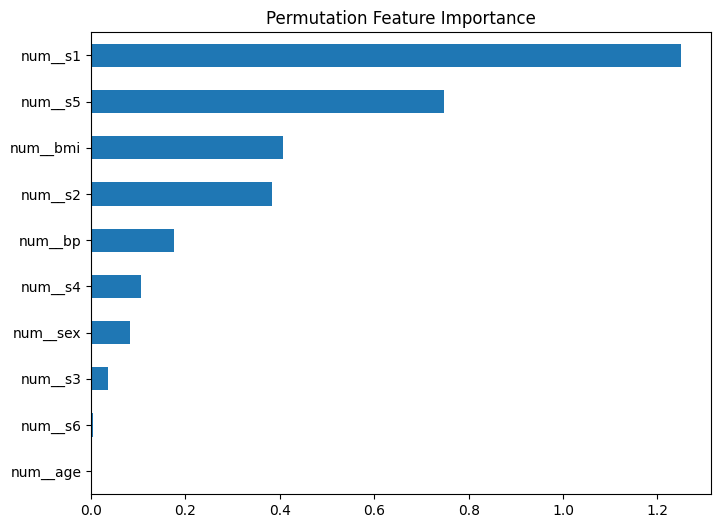

.values =
array([[ 2.92586607e+00, -1.26854572e+01,  6.57715798e+00, ...,
         9.38741419e+00,  1.99600174e+01, -3.08446572e-01],
       [-1.03265861e-01, -1.26854572e+01, -9.79265744e+00, ...,
         1.95469534e+01,  1.52337345e-02,  6.99548761e-01],
       [ 4.47485399e-01,  1.03790105e+01,  2.70394273e+01, ...,
        -7.72124977e-01,  1.23565719e+01, -9.13243772e-01],
       ...,
       [ 1.41130010e+00,  1.03790105e+01, -1.09619300e+01, ...,
        -1.09316641e+01, -8.21232506e+00, -3.08446572e-01],
       [-2.40953676e-01,  1.03790105e+01, -1.27158388e+01, ...,
        -7.72124977e-01, -2.84993644e+01, -2.12283817e+00],
       [-3.27008561e+00,  1.03790105e+01,  1.53467020e+01, ...,
        -1.09316641e+01, -3.97103863e+00, -3.08446572e-01]],
      shape=(353, 10))

.base_values =
array([149.94907458, 149.94907458, 149.94907458, 149.94907458,
       149.94907458, 149.94907458, 149.94907458, 149.94907458,
       149.94907458, 149.94907458, 149.94907458, 149.94907458,
     

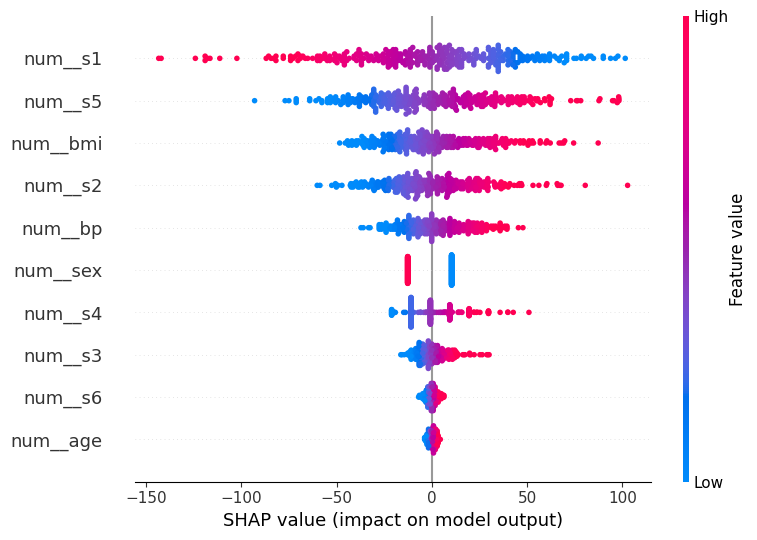

In [9]:
# Regression interpretation
interp_reg = ModelInterpreter(reg_pipe.pipeline, X_train_reg, task='regression')
interp_reg.summary()
interp_reg.coefficients()
interp_reg.permutation_importance(scoring='r2')
interp_reg.shap_summary()
